In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import glob

In [2]:
def file_list(folder):
    files = glob.glob(folder)
    sample_names =[]
    for file in files:
        sample_names.append(file[:])
    
    return sample_names

sample_name1 = file_list("./data/2ko/drive/*.csv")
sample_name2 = file_list("./data/2ko/FOV/*.csv")

print(sample_name1)
print(sample_name2)

i, j = 1,1

['./data/2ko/drive\\2022-11-02-20-12-02_3v58.csv', './data/2ko/drive\\2022-11-04-17-04-29_3v58.csv', './data/2ko/drive\\2022-11-04-17-15-15_3v58.csv']
['./data/2ko/FOV\\2022-11-02-20-54-15_FOV_3v58.csv', './data/2ko/FOV\\2022-11-04-17-04-38_FOV_3v58.csv', './data/2ko/FOV\\2022-11-04-17-15-30_FOV_3v58.csv']


In [3]:
# file
file_drive = sample_name1[i]
df1 = pd.read_csv(file_drive, index_col=0)
sample_name = file_drive[-28:-4]
print(sample_name)
df1.head()

2022-11-04-17-04-29_3v58


,Time,humidity,temperature,vpp_sum1,vpp_sum2,delay_slow,delay_fast,delay_pp_slow,delay_pp_fast,Ch1_word,Ch2_word,Ch1_Amp,Ch2_Amp
0,2022/11/04 16:49:38,33.731079,26.910858,455135.0,693858.0,4122.821169,1708.010344,0.0,0.0,3.249717e+15,1.620176e+15,13.6,14.6
1,2022/11/04 16:49:40,33.764648,26.921539,453040.0,697040.0,4136.350754,1705.642363,0.0,0.0,3.249723e+15,1.620179e+15,13.6,14.6
2,2022/11/04 16:49:42,33.758545,26.956253,452999.0,693724.0,4152.188133,1706.859614,0.0,0.0,3.249728e+15,1.620181e+15,13.6,14.6
3,2022/11/04 16:49:44,33.737183,27.020340,452512.0,695414.0,4163.547463,1708.987866,0.0,0.0,3.249731e+15,1.620183e+15,13.6,14.6
4,2022/11/04 16:49:46,33.706665,27.033691,451076.0,698099.0,4177.148750,1706.401772,0.0,0.0,3.249734e+15,1.620184e+15,13.6,14.6


In [4]:
# file
file_drive =  sample_name2[j]
df2 = pd.read_csv(file_drive, index_col=0)
df2.head()

,Time,-x,+x,2x,-y,+y,2y
0,2022/11/04 16:49:52,-27.703023,28.265239,55.968263,-17.443045,17.832983,35.276028
1,2022/11/04 16:49:53,-27.703023,28.265239,55.968263,-17.443045,17.832983,35.276028
2,2022/11/04 16:49:54,-27.745700,28.265239,56.010940,-17.443045,17.783319,35.226363
3,2022/11/04 16:49:55,-27.703023,28.265239,55.968263,-17.443045,17.783319,35.226363
4,2022/11/04 16:49:56,-27.703023,28.265239,55.968263,-17.393165,17.783319,35.176484


In [5]:
time1 = pd.to_datetime(df1["Time"]) 
time1 = time1.dt.round("s")

time2 = pd.to_datetime(df2["Time"]) 
time2 = time2.dt.round("s")

time1[len(time1)-1]

Timestamp('2022-11-04 17:04:28')

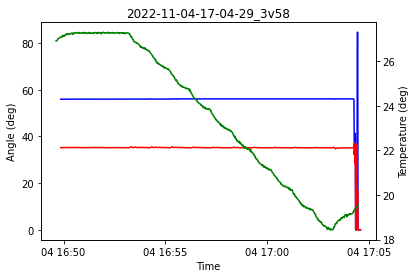

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

#plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(0,60)
#ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

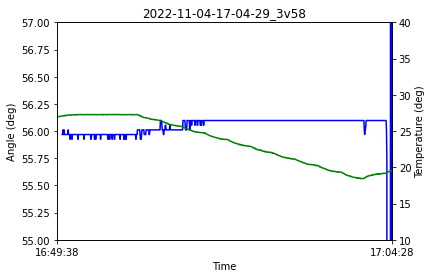

In [18]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(55,57)
ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

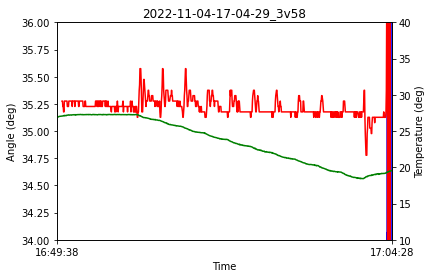

In [19]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(34,36)
ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

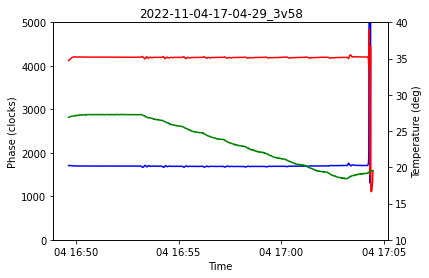

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]
#plt.xlim([xmin,xmax])

ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(0,5000)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

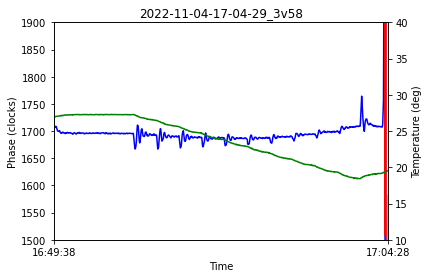

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1500,1900)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

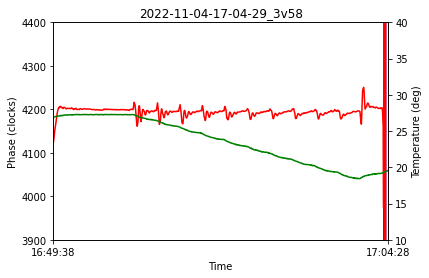

In [21]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(3900,4400)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

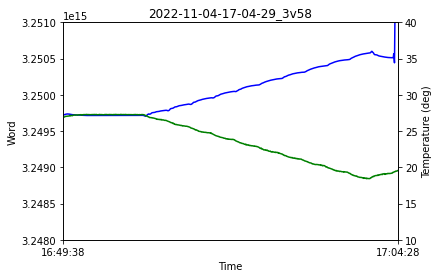

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Word")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(3.248e15,3.251e15)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["Ch1_word"], color='b')
ax1.plot(time1, df1["Ch2_word"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

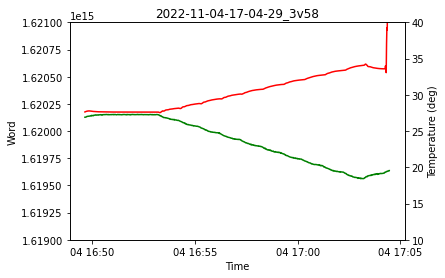

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Word")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

#plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1.619e15,1.621e15)
ax2.set_ylim(10,40)

#ax1.plot(time1, df1["Ch1_word"], color='b')
ax1.plot(time1, df1["Ch2_word"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

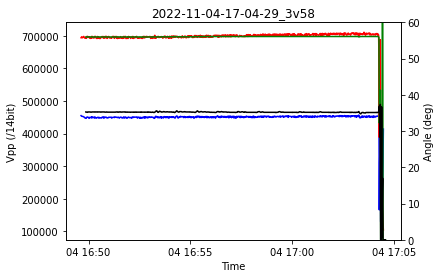

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Vpp (/14bit)")
ax2.set_ylabel("Angle (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]
#plt.xlim([xmin,xmax])

ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(0,5000)
ax2.set_ylim(0,60)

ax1.plot(time1, df1["vpp_sum1"], color='b')
ax1.plot(time1, df1["vpp_sum2"], color='r')
ax2.plot(time2, df2["2x"], color='g')
ax2.plot(time2, df2["2y"], color='k')